Silhouette Scores for K-Means with Min-Max Scaling and PCA:
Number of Clusters: 4, Silhouette Score: 0.8312
Number of Clusters: 5, Silhouette Score: 0.6835
Number of Clusters: 6, Silhouette Score: 0.5021
Number of Clusters: 7, Silhouette Score: 0.4770
Number of Clusters: 8, Silhouette Score: 0.4407
Number of Clusters: 9, Silhouette Score: 0.4527
Number of Clusters: 10, Silhouette Score: 0.4659


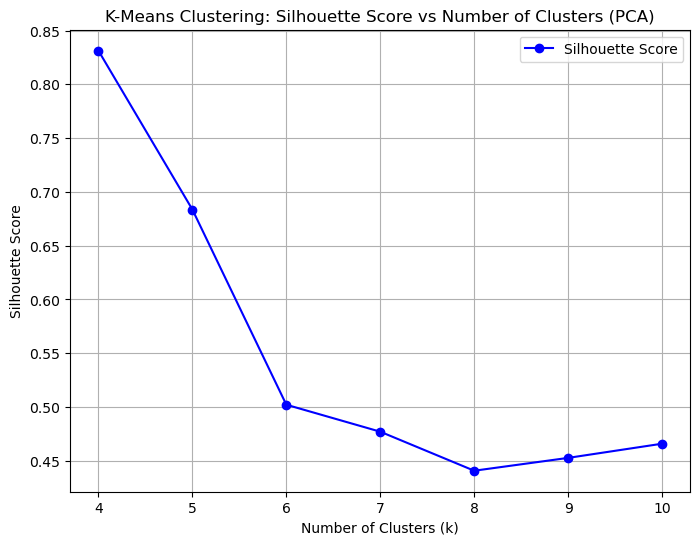

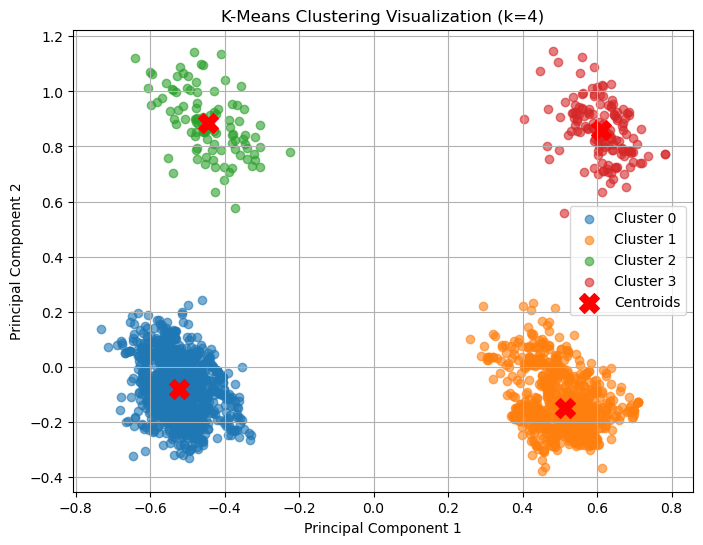

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Load the dataset
# Replace 'your_dataset_path.csv' with the actual path to your dataset
data = pd.read_csv('encoded_dataset.csv')

# Step 2: Drop the class label columns
# Replace 'Broad_Class' or 'Broad_Class_Encoded' with the actual class label column names
features = data.drop(columns=['Broad_Class', 'Broad_Class_Encoded'], errors='ignore')

# Step 3: Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
minmax_normalized_data = minmax_scaler.fit_transform(features)

# Step 4: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for clustering and visualization
reduced_data = pca.fit_transform(minmax_normalized_data)

# Step 5: Perform K-Means for a range of k values (4 to 10) and calculate Silhouette Scores
k_values = range(4, 11)
silhouette_scores_kmeans_pca = {}

for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_model.fit_predict(reduced_data)
    silhouette_scores_kmeans_pca[k] = silhouette_score(reduced_data, labels)

# Display Silhouette Scores
print("Silhouette Scores for K-Means with Min-Max Scaling and PCA:")
for k, score in silhouette_scores_kmeans_pca.items():
    print(f"Number of Clusters: {k}, Silhouette Score: {score:.4f}")

# Step 6: Visualize the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(list(silhouette_scores_kmeans_pca.keys()), 
         list(silhouette_scores_kmeans_pca.values()), 
         marker='o', linestyle='-', color='b', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('K-Means Clustering: Silhouette Score vs Number of Clusters (PCA)')
plt.grid(True)
plt.legend()
plt.show()

# Step 7: Visualize the clusters for the optimal k (e.g., k=4)
optimal_k = 4  # Based on the best Silhouette Score
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans_model.fit_predict(reduced_data)

plt.figure(figsize=(8, 6))
for cluster in set(labels):
    cluster_data = reduced_data[labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.6)

# Add centroids to the plot
centroids = kmeans_model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

# Finalize plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering Visualization (k={optimal_k})')
plt.legend()
plt.grid(True)
plt.show()


Cluster Characteristics (Feature Means):
         Gender        Age    Height     Weight  FAVC      FCVC       NCP  \
Cluster                                                                     
0           1.0  24.732863  1.761083  92.140352   1.0  2.274601  2.726199   
1           0.0  24.166099  1.650415  85.981143   1.0  2.563137  2.637992   
2           1.0  23.509448  1.736027  77.786494   0.0  2.270799  2.845492   
3           0.0  22.968531  1.598506  59.149214   0.0  2.593645  2.597344   

              FAF       TUE      CALC  
Cluster                                
0        1.143805  0.675624  1.731884  
1        0.798005  0.670097  1.765556  
2        1.414309  0.598471  1.686275  
3        1.156358  0.503294  1.545455  


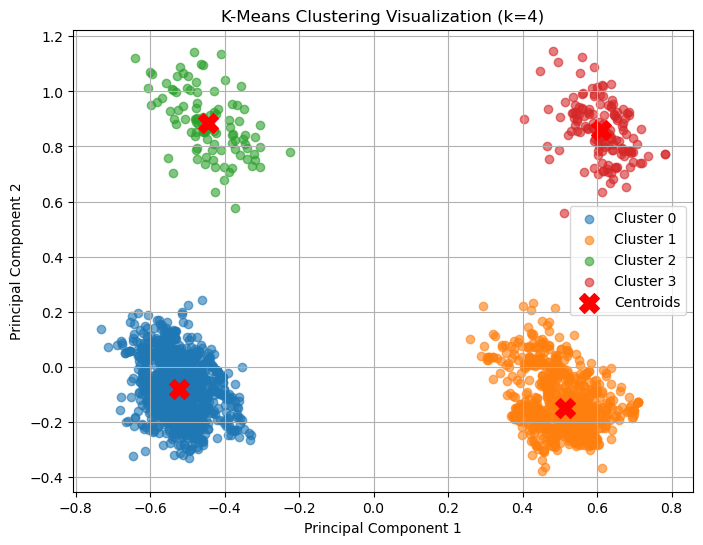

In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Load the dataset
# Replace 'your_dataset_path.csv' with the actual path to your dataset
data = pd.read_csv('encoded_dataset.csv')

# Step 2: Drop the class label columns
# Replace 'Broad_Class' or 'Broad_Class_Encoded' with the actual class label column names
features = data.drop(columns=['Broad_Class', 'Broad_Class_Encoded'], errors='ignore')

# Step 3: Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
minmax_normalized_data = minmax_scaler.fit_transform(features)

# Step 4: Apply PCA for Dimensionality Reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for clustering and visualization
reduced_data = pca.fit_transform(minmax_normalized_data)

# Step 5: Perform K-Means for Optimal k (e.g., k=4 based on Silhouette Score)
optimal_k = 4  # Best value for k based on prior results
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans_model.fit_predict(reduced_data)

# Step 6: Add Cluster Labels to Original Dataset
data['Cluster'] = labels

# Step 7: Calculate Feature Means for Each Cluster (Exclude Non-Numeric Columns)
numeric_columns = features.select_dtypes(include=['number']).columns  # Select only numeric columns
cluster_characteristics = data.groupby('Cluster')[numeric_columns].mean()

# # Display cluster characteristics
# print("Cluster Characteristics (Feature Means):")
# print(cluster_characteristics)


# # Step 7: Calculate Feature Means for Each Cluster
# cluster_characteristics = data.groupby('Cluster').mean()

# Display cluster characteristics
print("Cluster Characteristics (Feature Means):")
print(cluster_characteristics)

# Step 8: Visualize Clusters in PCA Space
plt.figure(figsize=(8, 6))
for cluster in set(labels):
    cluster_data = reduced_data[labels == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}', alpha=0.6)

# Add centroids to the plot
centroids = kmeans_model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

# Finalize plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering Visualization (k={optimal_k})')
plt.legend()
plt.grid(True)
plt.show()
